**Importing Data**

In [11]:
import os

DATASET_PATH = "Dataset/original_audio"

def fetch_dataset(dataset_path):
    dataset = []
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath is not dataset_path:
            for filename in filenames:
                if filename.endswith(".wav"):  # Ensure we're processing only WAV files
                    # Getting Files 1 by 1
                    file_path = os.path.join(dirpath, filename)
                
                    # Append file_path to the dataset
                    dataset.append(file_path)
    return dataset


In [1]:
pip install tabulate

**Checking No. Of Audio In each Class**

In [2]:
from tabulate import tabulate

def display_data(dataset):
    class_counts = {}
    total_audio_files = 0  # Initialize a variable to keep track of the total audio files
    
    for file_path in dataset:
        class_name = os.path.basename(os.path.dirname(file_path))
        if class_name in class_counts:
            class_counts[class_name] += 1
        else:
            class_counts[class_name] = 1
    
        total_audio_files += 1  # Increment the total count for each file

    class_data = [[class_name, count] for class_name, count in class_counts.items()]
    table = tabulate(class_data, headers=["Class Name", "Total Audio Files"], tablefmt="grid")
    
    print(table)
    print(f"Total Audio : {total_audio_files}")  # Print the total audio files count
    
if __name__ == "__main__":
    your_dataset = fetch_dataset(DATASET_PATH)
    display_data(your_dataset)

+-------------------+---------------------+
| Class Name        |   Total Audio Files |
+===================+=====================+
| airport           |                2302 |
+-------------------+---------------------+
| bus               |                2304 |
+-------------------+---------------------+
| metro             |                2304 |
+-------------------+---------------------+
| metro_station     |                2304 |
+-------------------+---------------------+
| park              |                2304 |
+-------------------+---------------------+
| public_square     |                2303 |
+-------------------+---------------------+
| shopping_mall     |                2303 |
+-------------------+---------------------+
| street_pedestrain |                2304 |
+-------------------+---------------------+
| street_traffic    |                2304 |
+-------------------+---------------------+
| tram              |                2303 |
+-------------------+-----------

In [10]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.


**Sampling Rate of Audio**

In [3]:
from pydub import AudioSegment

# Escape backslashes with double backslashes
sample_rate = AudioSegment.from_file("Dataset\\original_audio\\airport\\airport-barcelona-0-1-a.wav").frame_rate
print(f"The sampling rate of the audio is {sample_rate} Hz.")

c:\Users\userd\AppData\Local\Programs\Python\Python311\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


The sampling rate of the audio is 44100 Hz.


**WaveForm**

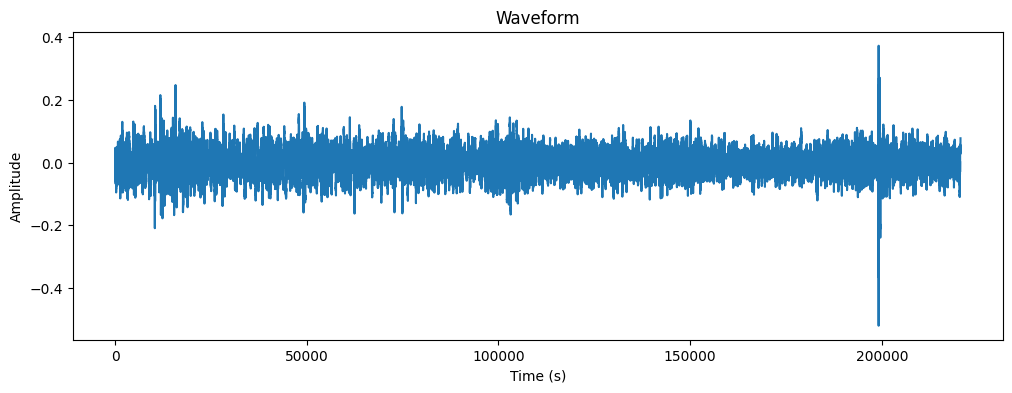

In [4]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd

file_name = 'Dataset\\original_audio\\airport\\airport-barcelona-0-1-a.wav'

audio_data, sampling_rate = librosa.load(file_name)
plt.figure(figsize=(12, 4))
plt.plot(audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

ipd.Audio(file_name)

**Checking If all the Audio Wave of 10 Sec or Not**

In [36]:
# Use the fetch_dataset function from your 1st part to obtain the list of audio files
audio_files = fetch_dataset(DATASET_PATH)

# Sample rate for your audio files (e.g., 44100 for 44.1 kHz)
sample_rate = 44100

# Desired duration in seconds (e.g., 10 seconds)
desired_duration = 10

# Tolerance for duration matching (in seconds)
duration_tolerance = 1  # Adjust this as needed

def is_audio_10_seconds(file_path, sample_rate, desired_duration, tolerance):
    try:
        # Load the audio file
        signal, sr = librosa.load(file_path, sr=sample_rate)

        # Calculate the duration in seconds
        duration = len(signal) / sample_rate

        # Check if the duration is within the desired range
        return abs(duration - desired_duration) <= tolerance

    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return False

# Check the duration of each audio file and print a message for each
for audio_file in audio_files:
    if is_audio_10_seconds(audio_file, sample_rate, desired_duration, duration_tolerance):
        print(f"{audio_file} is approximately 10 seconds long.")
    else:
        print(f"{audio_file} is not approximately 10 seconds long.")

Dataset/original_audio\airport\airport-barcelona-0-0-a.wav is approximately 10 seconds long.
Dataset/original_audio\airport\airport-barcelona-0-1-a.wav is approximately 10 seconds long.
Dataset/original_audio\airport\airport-barcelona-0-10-a.wav is approximately 10 seconds long.
Dataset/original_audio\airport\airport-barcelona-0-10-s4.wav is approximately 10 seconds long.
Dataset/original_audio\airport\airport-barcelona-0-11-a.wav is approximately 10 seconds long.
Dataset/original_audio\airport\airport-barcelona-0-12-a.wav is approximately 10 seconds long.
Dataset/original_audio\airport\airport-barcelona-0-13-a.wav is approximately 10 seconds long.
Dataset/original_audio\airport\airport-barcelona-0-14-a.wav is approximately 10 seconds long.
Dataset/original_audio\airport\airport-barcelona-0-15-a.wav is approximately 10 seconds long.
Dataset/original_audio\airport\airport-barcelona-0-2-a.wav is approximately 10 seconds long.
Dataset/original_audio\airport\airport-barcelona-0-2-c.wav is 

**Extrating MFCC Features & Saving it in Json format**

In [ ]:
import json
import os
import librosa
import librosa.feature
import math

DATASET_PATH = "Dataset\original_audio"
JSON_PATH = "data.json"
SAMPLE_RATE = 44100
DURATION = 10
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION


In [42]:


def save_mfcc(dataset_path, json_path, n_mfcc=14, n_fft=2048, hop_length=512, num_segments=1):
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    num_samples_per_segment = SAMPLES_PER_TRACK // num_segments
    expected_n_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath is not dataset_path:
            dirpath_comp = dirpath.split("//")
            semantic_label = dirpath_comp[-1]
            data["mapping"].append(semantic_label)
            print(f"Processing {semantic_label}")
            for f in filenames:
                # Getting Files 1 by 1
                file_path = os.path.join(dirpath, f)

                # Calculate Signal for each File
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)

                for s in range(num_segments):
                    # Divide each file into Segments
                    start_sample = num_samples_per_segment * s
                    finish_sample = start_sample + num_samples_per_segment

                    # Calculate 13 MFCC Vectors for each segment
                    mfcc = librosa.feature.mfcc(y=signal[start_sample:finish_sample], sr=sr, n_mfcc=n_mfcc, n_fft=n_fft,
                                                hop_length=hop_length)
                    mfcc = mfcc.T

                    # Discard segments shorter than expected
                    if len(mfcc) == expected_n_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data['labels'].append(i - 1)
                        print(f"{file_path},segment:{s + 1}")
                print()

    # Put all data in JSON File
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=1)


Processing Dataset/original_audio\airport\airport-barcelona-0-0-a.wav
Processing Dataset/original_audio\airport\airport-barcelona-0-1-a.wav
Processing Dataset/original_audio\airport\airport-barcelona-0-10-a.wav
Processing Dataset/original_audio\airport\airport-barcelona-0-10-s4.wav
Processing Dataset/original_audio\airport\airport-barcelona-0-11-a.wav
Processing Dataset/original_audio\airport\airport-barcelona-0-12-a.wav
Processing Dataset/original_audio\airport\airport-barcelona-0-13-a.wav
Processing Dataset/original_audio\airport\airport-barcelona-0-14-a.wav
Processing Dataset/original_audio\airport\airport-barcelona-0-15-a.wav
Processing Dataset/original_audio\airport\airport-barcelona-0-2-a.wav
Processing Dataset/original_audio\airport\airport-barcelona-0-2-c.wav
Processing Dataset/original_audio\airport\airport-barcelona-0-2-s5.wav
Processing Dataset/original_audio\airport\airport-barcelona-0-2-s6.wav
Processing Dataset/original_audio\airport\airport-barcelona-0-3-a.wav
Processing

**Spliting into Train, Validation, Test**

In [45]:
import json
import numpy as np
from sklearn.model_selection import train_test_split

DATA_FILE = "data.json"

def loadData(dataset):
    with open(dataset, "r") as fp:
        data = json.load(fp)
    inputs = np.array(data["mfcc"])
    targets = np.array(data['labels'])
    return inputs, targets

def prepareDatasets(inputs, targets):
    x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.25)
    x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2)

    # Add 3d Axis for convolution layers
    x_train = x_train[..., np.newaxis]
    x_validation = x_validation[..., np.newaxis]
    x_test = x_test[..., np.newaxis]
    return x_train, x_test, x_validation, y_train, y_test, y_validation


if __name__ == "__main__":
    # Load Data
    inputs, targets = loadData(DATA_FILE)

    # Prepare Datasets
    x_train, x_test, x_validation, y_train, y_test, y_validation = prepareDatasets(inputs, targets)

**Build Model**

In [46]:
import keras

input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])

model = keras.Sequential([
    # 1st conv
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
    keras.layers.MaxPool2D((3, 3), (2, 2), padding="same"),
    keras.layers.BatchNormalization(),

    # 2nd conv
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
    keras.layers.MaxPool2D((3, 3), (2, 2), padding="same"),
    keras.layers.BatchNormalization(),

    # 3rd conv
    keras.layers.Conv2D(32, (2, 2), activation="relu", input_shape=input_shape),
    keras.layers.MaxPool2D((2, 2), (2, 2), padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    # Dense Layer
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.3),

    # Output Layer
    keras.layers.Dense(10, activation="softmax")
])

# Compile Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

**Model Summary**

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 11, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 6, 32)         0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 64, 6, 32)         128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 4, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 2, 32)         0         
 g2D)                                                            
                                                        

**Train Model**

In [48]:
# Train Model
cnn = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=50, batch_size=32)

Epoch 1/50
1296/1296 [==============================] - 112s 82ms/step - loss: 1.6804 - accuracy: 0.3838 - val_loss: 1.4835 - val_accuracy: 0.4358
Epoch 2/50
1296/1296 [==============================] - 106s 82ms/step - loss: 1.4653 - accuracy: 0.4509 - val_loss: 1.4473 - val_accuracy: 0.4560
Epoch 3/50
1296/1296 [==============================] - 108s 83ms/step - loss: 1.4058 - accuracy: 0.4715 - val_loss: 1.3862 - val_accuracy: 0.4868
Epoch 4/50
1296/1296 [==============================] - 107s 83ms/step - loss: 1.3657 - accuracy: 0.4826 - val_loss: 1.5043 - val_accuracy: 0.4514
Epoch 5/50
1296/1296 [==============================] - 107s 83ms/step - loss: 1.3310 - accuracy: 0.4943 - val_loss: 1.3465 - val_accuracy: 0.4858
Epoch 6/50
1296/1296 [==============================] - 108s 83ms/step - loss: 1.3110 - accuracy: 0.5047 - val_loss: 1.2358 - val_accuracy: 0.5258
Epoch 7/50
1296/1296 [==============================] - 108s 83ms/step - loss: 1.2912 - accuracy: 0.5130 - val_loss: 1

**Overall Test Accuracy & Error**

In [ ]:
#Evaluate
test_error, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy = ", test_accuracy, " Error=  ", test_error)

**Dump Model**

In [56]:
#Dump Model
model.save('cnn_best.h5')

c:\Users\userd\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Model Loss Plotting**

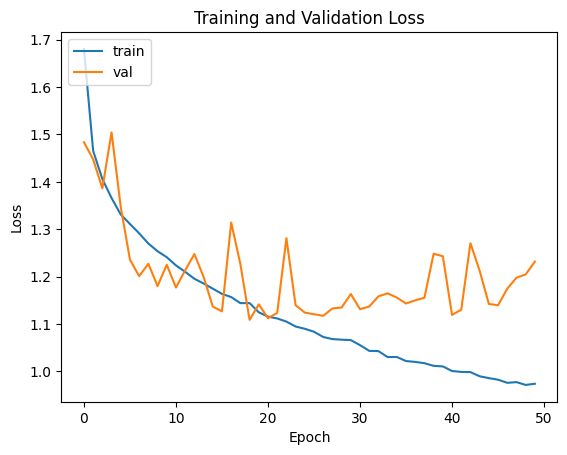

In [57]:
import matplotlib.pyplot as plt

# Plot Train Accuracy against Test Accuracy
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


**Model Accuracy Plotting**

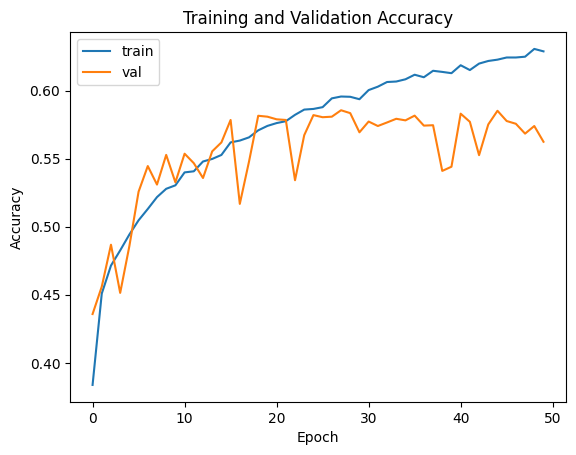

In [58]:
from matplotlib import pyplot as plt


plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Model Precision,Recall,f1score**

In [158]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generate predictions using the model on the test dataset
y_test_predicted = model.predict(x_test)

# Get the predicted class labels (assuming softmax output)
y_pred_labels = np.argmax(y_test_predicted, axis=1)

# Get the true labels from the test set
y_true = y_test  # Assuming y_test contains the true labels

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_labels)

# Calculate precision
precision = precision_score(y_true, y_pred_labels, average='weighted')

# Calculate recall
recall = recall_score(y_true, y_pred_labels, average='weighted')

# Calculate F1 score
f1 = f1_score(y_true, y_pred_labels, average='weighted')

# Print the metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



540/540 [==============================] - 16s 29ms/step
Test Accuracy: 0.5550153383110493
Precision: 0.5734140892459347
Recall: 0.5550153383110493
F1 Score: 0.5494846303705221


In [155]:
pip install seaborn


  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


**Calculating Confusion Matrix of Test, Validation & Train**

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions using the model on the train dataset
y_train_predicted = model.predict(x_train)
y_pred_labels_train = np.argmax(y_train_predicted, axis=1)

# Generate predictions using the model on the validation dataset
y_valid_predicted = model.predict(x_validation)
y_pred_labels_valid = np.argmax(y_valid_predicted, axis=1)

# Generate predictions using the model on the test dataset
y_test_predicted = model.predict(x_test)
y_pred_labels_test = np.argmax(y_test_predicted, axis=1)

# Calculate confusion matrices for train, validation, and test datasets
cm_train = confusion_matrix(y_train, y_pred_labels_train)
cm_valid = confusion_matrix(y_validation, y_pred_labels_valid)
cm_test = confusion_matrix(y_test, y_pred_labels_test)

# Define class labels (modify this according to your classes)
classes = ["Airport", "Bus", "Metro", "Metro_Station", "Park", "Public_Square", "Shopping_Mall", "Street_Pedestrian", "Street_Traffic", "Tram"]





540/540 [==============================] - 14s 25ms/step


**Confusion Matrix Of Train Dataset**

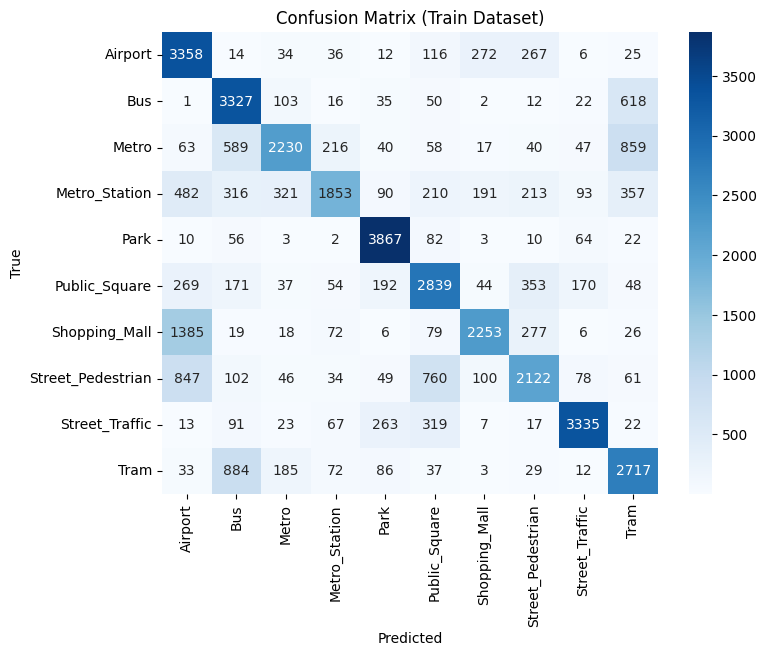

In [168]:

# Plot confusion matrix for the test dataset
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Train Dataset)")
plt.show()

**Confusion Matrix Of Valid Dataset**

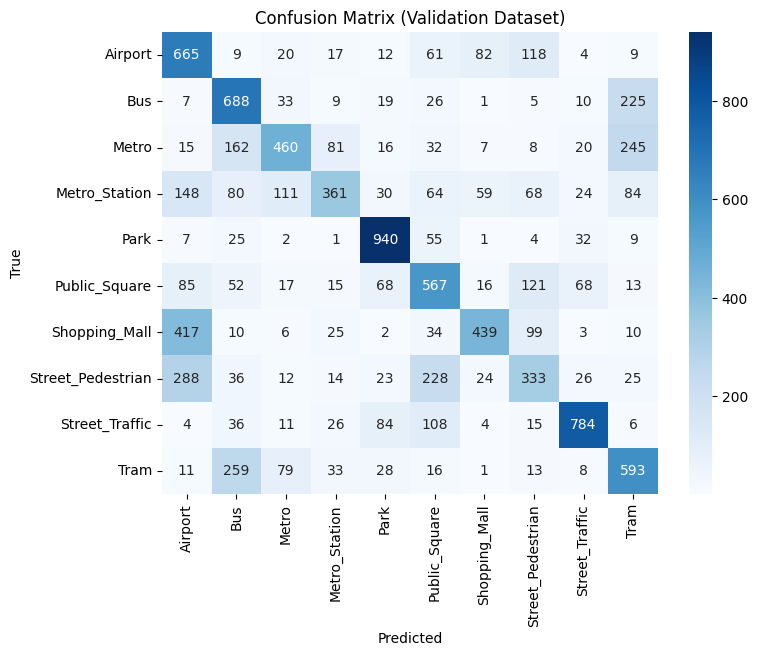

In [169]:
# Plot confusion matrix for the test dataset
plt.figure(figsize=(8, 6))
sns.heatmap(cm_valid, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Validation Dataset)")
plt.show()

**Confusion Matrix Of Test Dataset**

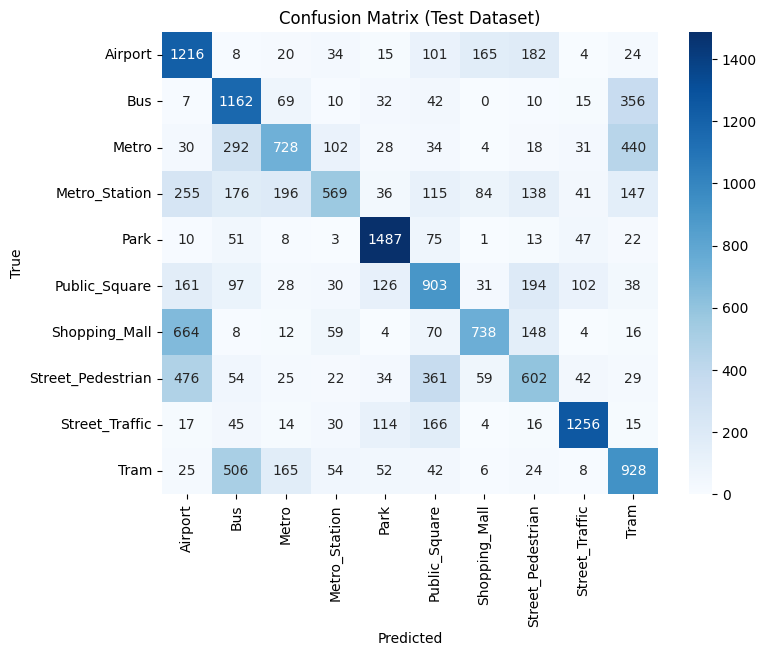

In [170]:
# Plot confusion matrix for the test dataset
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Test Dataset)")
plt.show()

**Prediction Audio With Spectrogram**

1/1 [==============================] - 0s 226ms/step
Overall Probability: 100.00%


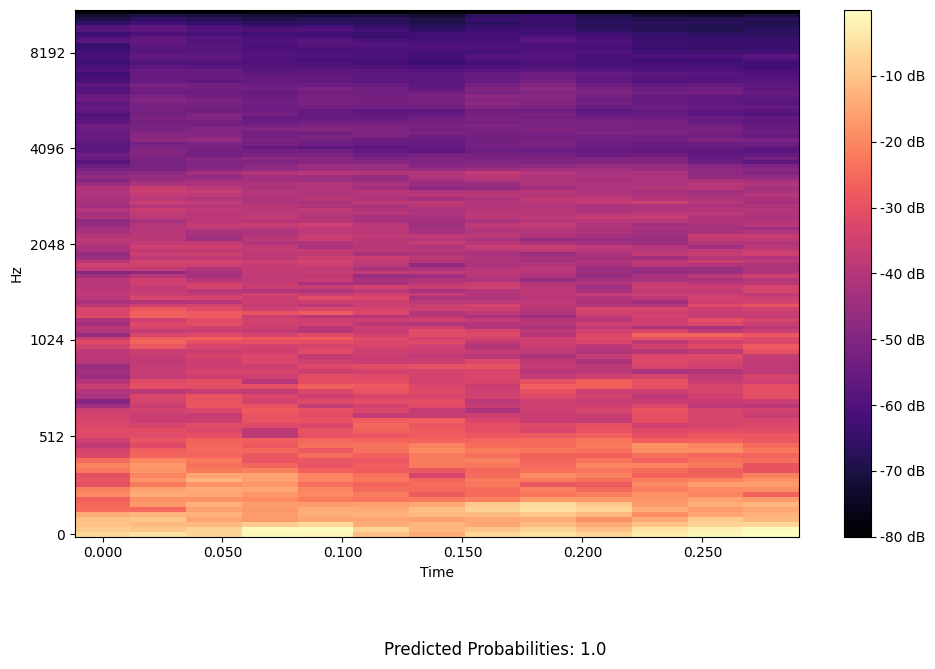

In [129]:
from tensorflow import keras
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load your trained model
model = keras.models.load_model('cnn_best.h5')  # Replace with your model file

# Define a function to make predictions
def predict_audio(model, audio_file_path):
    # Load and preprocess the audio file
    audio_data, _ = librosa.load(audio_file_path, sr=44100)  # You can adjust the sample rate as needed
    
    # Generate a mel spectrogram with the desired shape
    mel_spectrogram = librosa.feature.melspectrogram(
        y=audio_data, sr=44100, n_mels=130, hop_length=512  # Adjust n_mels and hop_length as needed
    )
    
    # Resize the mel spectrogram to match the expected input shape (if needed)
    if mel_spectrogram.shape[1] < 13:
        # If the number of time steps is less than 13, zero-pad it
        mel_spectrogram = np.pad(mel_spectrogram, ((0, 0), (0, 13 - mel_spectrogram.shape[1])), mode='constant')
    else:
        # If the number of time steps is greater than 13, truncate it
        mel_spectrogram = mel_spectrogram[:, :13]
    
    mel_spectrogram = mel_spectrogram.reshape(1, mel_spectrogram.shape[0], mel_spectrogram.shape[1], 1)

    # Make the prediction
    prediction = model.predict(mel_spectrogram)
    return mel_spectrogram, prediction

# Define the path to the audio file you want to classify
audio_file_path = 'Dataset/original_audio/airport/airport-barcelona-0-0-a.wav'

# Make a prediction
mel_spectrogram, prediction = predict_audio(model, audio_file_path)

# Display the mel spectrogram
plt.figure(figsize=(10, 6))
# Reshape the mel spectrogram for display
mel_spectrogram = mel_spectrogram[0, ..., 0]
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')

# Display the predicted class probabilities as percentages
overall_probability = np.max(prediction)  # Get the maximum probability
print(f"Overall Probability: {overall_probability * 100:.2f}%")

plt.tight_layout()
plt.figtext(0.5, -0.1, f"Predicted Probabilities: {overall_probability}", fontsize=12, ha='center')
plt.show()


**Prediction Audio with WaveForm**

1/1 [==============================] - 0s 294ms/step
Overall Probability: 1.0


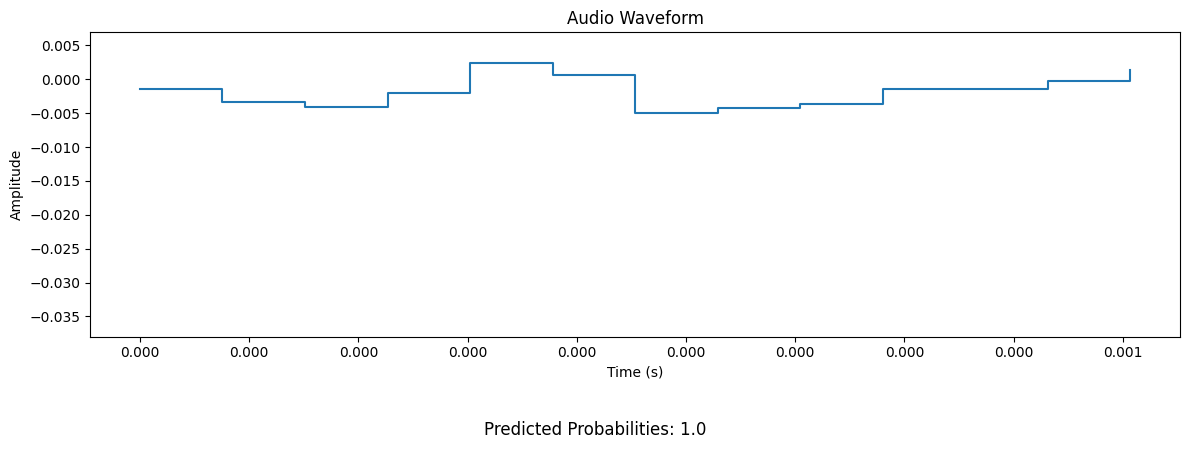

In [153]:
from tensorflow import keras
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tabulate import tabulate

# Load your trained model
model = keras.models.load_model('cnn_best.h5')  # Replace with your model file

# Define a function to make predictions
def predict_audio(model, audio_file_path):
    # Load and preprocess the audio file
    audio_data, _ = librosa.load(audio_file_path, sr=22050, duration=10.0)  # Set duration to 10 seconds

    # Resize the audio waveform to match the expected input shape (if needed)
    target_shape = (130, 13, 1)  # Target input shape
    if audio_data.shape[0] < np.prod(target_shape):
        # If the audio duration is less than the required length, zero-pad it
        audio_data = np.pad(audio_data, (0, np.prod(target_shape) - audio_data.shape[0]), mode='constant')
    else:
        # If the audio duration is greater, truncate it
        audio_data = audio_data[:np.prod(target_shape)]

    audio_data = audio_data.reshape(1, *target_shape)  # Reshape to match the model's input shape

    # Make the prediction
    prediction = model.predict(audio_data)
    return audio_data, prediction

# Define the path to the audio file you want to classify
audio_file_path = 'Dataset/original_audio/airport/airport-barcelona-0-0-a.wav'

# Make a prediction
audio_waveform, prediction = predict_audio(model, audio_file_path)

#Define class names and associated cities (where each class can have multiple cities)
class_names = ["Airport", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"], "Bus", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"],"Metro", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"], "Metro_Station", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"], "Park", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"], "Public_Square", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"], "Shopping_Mall", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"],"Street_Pedestrain", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"],"Street_Traffic", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"], "Tram", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"] ] 
cities = [city if isinstance(city, list) else [city] for city in class_names]

# Get the predicted class index and probability
predicted_class_index = np.argmax(prediction)
predicted_class_name = class_names[predicted_class_index]
predicted_city = cities[predicted_class_index]
overall_probability = np.max(prediction)  # Get the maximum probability

# Create a table with class, city, and probability
table_data = [
    ["Class", "City", "Probability"],
    [predicted_class_name[0], ', '.join(predicted_city[0]), f"{overall_probability * 100:.2f}%"]
]

# Display the audio waveform
plt.figure(figsize=(12, 4))
audio_waveform = audio_waveform[0, :, :, 0]  # Extract the waveform from the reshaped data
librosa.display.waveshow(audio_waveform, sr=22050)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("Audio Waveform")

# Display the predicted class probabilities as percentages
overall_probability = np.max(prediction)  # Get the maximum probability
print(f"Overall Probability: {overall_probability}")
plt.tight_layout()
plt.figtext(0.5, -0.1, f"Predicted Probabilities: {overall_probability}", fontsize=12, ha='center')
plt.show()


1/1 [==============================] - 0s 43ms/step
+-----------+--------+--------------+
| Class     | City   | Percentage   |
+===========+========+==============+
| Barcelona | Lisbon | 100.00%      |
+-----------+--------+--------------+
Overall Probability: 1.0


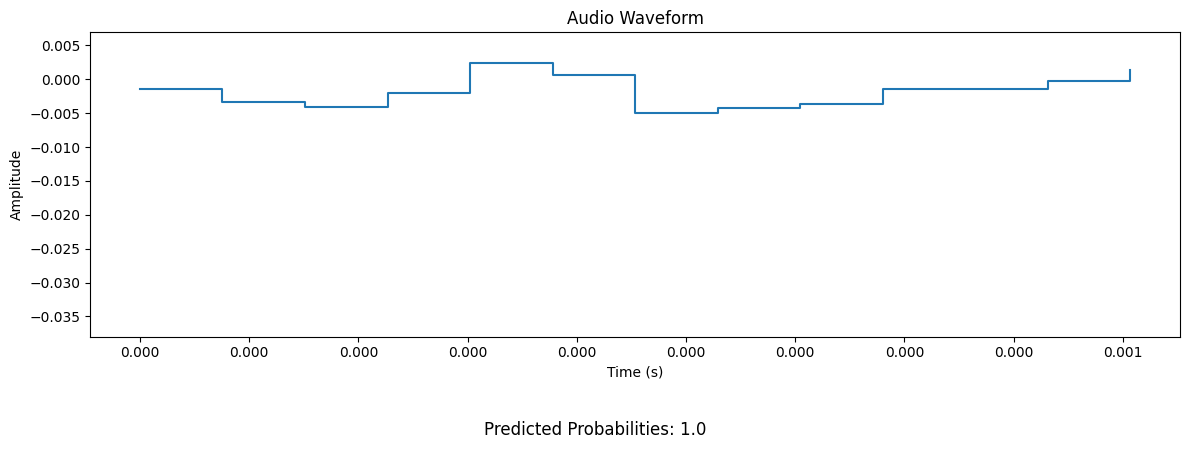

In [150]:
from tensorflow import keras
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tabulate import tabulate

# Load your trained model
model = keras.models.load_model('cnn_best.h5')  # Replace with your model file

# Define a function to make predictions
def predict_audio(model, audio_file_path):
    # Load and preprocess the audio file
    audio_data, _ = librosa.load(audio_file_path, sr=22050, duration=10.0)  # Set duration to 10 seconds

    # Resize the audio waveform to match the expected input shape (if needed)
    target_shape = (130, 13, 1)  # Target input shape
    if audio_data.shape[0] < np.prod(target_shape):
        # If the audio duration is less than the required length, zero-pad it
        audio_data = np.pad(audio_data, (0, np.prod(target_shape) - audio_data.shape[0]), mode='constant')
    else:
        # If the audio duration is greater, truncate it
        audio_data = audio_data[:np.prod(target_shape)]

    audio_data = audio_data.reshape(1, *target_shape)  # Reshape to match the model's input shape

    # Make the prediction
    prediction = model.predict(audio_data)
    return audio_data, prediction
# Define the path to the audio file you want to classify
audio_file_path = 'Dataset/original_audio/airport/airport-barcelona-0-0-a.wav'

# Make a prediction
audio_waveform, prediction = predict_audio(model, audio_file_path)

# Define class names and associated cities (where each class can have multiple cities)
class_names = [
    "aeroplane", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"],
    "bus", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"],
    "metro", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"],
    "metro_station", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"],
    "park", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"],
    "public_square", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"],
    "shopping_mall", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"],
    "street_pedestrian", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"],
    "street_traffic", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"],
    "tram", ["Barcelona", "Helsinki", "Lisbon", "London", "Lyon", "Milan", "Paris", "Prague", "Stockholm", "Vienna"]
]

# Get the predicted class index and probability
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]

# Initialize city as "Unknown"
predicted_city = "Unknown"

# Check if the predicted class has associated cities
if isinstance(predicted_class, list) and len(predicted_class) > 1:
    predicted_class_name = predicted_class[0]
    predicted_city = predicted_class[predicted_class_index // 2]  # Use integer division to select the correct city
else:
    predicted_class_name = predicted_class[0]

overall_probability = np.max(prediction)  # Get the maximum probability

# Create a table with class, city, and probability
table_data = [
    ["Class", "City", "Percentage"],
    [predicted_class_name, predicted_city, f"{overall_probability * 100:.2f}%"]
]

# Display the audio waveform
plt.figure(figsize=(12, 4))
audio_waveform, _ = predict_audio(model, audio_file_path)  # Ensure you also get the audio waveform
audio_waveform = audio_waveform[0, :, :, 0]  # Extract the waveform from the reshaped data
librosa.display.waveshow(audio_waveform, sr=22050)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title("Audio Waveform")

# Display the predicted class, city, and probability as a table
print(tabulate(table_data, headers="firstrow", tablefmt="grid"))
# Display the predicted class probabilities as percentages
overall_probability = np.max(prediction)  # Get the maximum probability
print(f"Overall Probability: {overall_probability}")
plt.tight_layout()
plt.figtext(0.5, -0.1, f"Predicted Probabilities: {overall_probability}", fontsize=12, ha='center')
plt.show()

In [12]:
import json
import keras
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

DATA_FILE = "data.json"


def plotHistory(history):
    fig, ax = plt.subplots(2)

    # Plot Train Accuracy against Test Accuracy
    ax[0].plot(history.history["accuracy"], label="train accuracy")
    ax[0].plot(history.history["val_accuracy"], label="test accuracy")
    ax[0].set_ylabel("Accuracy")
    ax[0].legend(loc="lower right")
    ax[0].set_title("Accuracy eval")

    # Plot Train Loss against Test Loss
    ax[1].plot(history.history["loss"], label="train error")
    ax[1].plot(history.history["val_loss"], label="test error")
    ax[1].set_ylabel("Loss")
    ax[1].set_xlabel("Epoch")
    ax[1].legend(loc="lower right")
    ax[1].set_title("Loss eval")
    plt.show()


def loadData(dataset):
    with open(dataset, "r") as fp:
        data = json.load(fp)
    inputs = np.array(data["mfcc"])
    targets = np.array(data['labels'])
    return inputs, targets


def buildModel(input_shape):
    model = keras.Sequential([
        # 1st conv
        keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
        keras.layers.MaxPool2D((3, 3), (2, 2), padding="same"),
        keras.layers.BatchNormalization(),

        # 2nd conv
        keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape),
        keras.layers.MaxPool2D((3, 3), (2, 2), padding="same"),
        keras.layers.BatchNormalization(),

        # 3rd conv
        keras.layers.Conv2D(32, (2, 2), activation="relu", input_shape=input_shape),
        keras.layers.MaxPool2D((2, 2), (2, 2), padding="same"),
        keras.layers.BatchNormalization(),

        keras.layers.Flatten(),
        # Dense Layer
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.3),

        # Output Layer
        keras.layers.Dense(10, activation="softmax")
    ])
    return model


def prepareDatasets(inputs, targets):
    x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.25)
    x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2)

    # Add 3d Axis for convolution layers
    x_train = x_train[..., np.newaxis]
    x_validation = x_validation[..., np.newaxis]
    x_test = x_test[..., np.newaxis]
    return x_train, x_test, x_validation, y_train, y_test, y_validation


if __name__ == "__main__":
    # Load Data
    inputs, targets = loadData(DATA_FILE)

    # Prepare Datasets
    x_train, x_test, x_validation, y_train, y_test, y_validation = prepareDatasets(inputs, targets)

    # Build Model
    input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])
    model = buildModel(input_shape)

    # Compile Model
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    # Train Model
    history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=100, batch_size=32)

    # Evaluate
    plotHistory(history)
    test_error, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
    print("Accuracy = ", test_accuracy, " Error=  ", test_error)


ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.